In [1]:
import pandas as pd

In [3]:
url = 'https://raw.githubusercontent.com/kish-crack/datasets/main/AAPL.csv?token=GHSAT0AAAAAAB2XZCH6WD7XKPS37XGODEHGY3D3QHQ'
df = pd.read_csv(url)

In [4]:
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [6]:
df.tail()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,1253,AAPL,2020-05-18 00:00:00+00:00,314.96,316.50,310.3241,313.17,33843125,314.96,316.50,310.3241,313.17,33843125,0.0,1.0
1254,1254,AAPL,2020-05-19 00:00:00+00:00,313.14,318.52,313.0100,315.03,25432385,313.14,318.52,313.0100,315.03,25432385,0.0,1.0
1255,1255,AAPL,2020-05-20 00:00:00+00:00,319.23,319.52,316.2000,316.68,27876215,319.23,319.52,316.2000,316.68,27876215,0.0,1.0
1256,1256,AAPL,2020-05-21 00:00:00+00:00,316.85,320.89,315.8700,318.66,25672211,316.85,320.89,315.8700,318.66,25672211,0.0,1.0
1257,1257,AAPL,2020-05-22 00:00:00+00:00,318.89,319.23,315.3500,315.77,20450754,318.89,319.23,315.3500,315.77,20450754,0.0,1.0


In [8]:
df1=df.reset_index()['close']
df1

0       132.045
1       131.780
2       130.280
3       130.535
4       129.960
         ...   
1253    314.960
1254    313.140
1255    319.230
1256    316.850
1257    318.890
Name: close, Length: 1258, dtype: float64

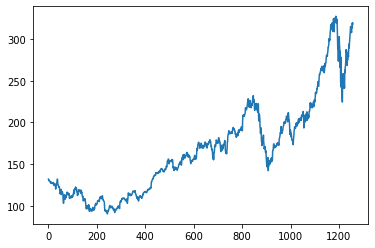

In [9]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [10]:
import numpy as np
df1

0       132.045
1       131.780
2       130.280
3       130.535
4       129.960
         ...   
1253    314.960
1254    313.140
1255    319.230
1256    316.850
1257    318.890
Name: close, Length: 1258, dtype: float64

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

print(df1)

[[0.17607447]
 [0.17495567]
 [0.16862282]
 ...
 [0.96635143]
 [0.9563033 ]
 [0.96491598]]


In [14]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

training_size,test_size

train_data

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       [0.1696994 ],
       [0.16727181],
       [0.16794731],
       [0.16473866],
       [0.16174111],
       [0.1581525 ],
       [0.15654817],
       [0.16271215],
       [0.1614878 ],
       [0.1554927 ],
       [0.15443722],
       [0.15730811],
       [0.15604154],
       [0.15849025],
       [0.15308621],
       [0.15735033],
       [0.15490163],
       [0.15946129],
       [0.15688592],
       [0.1537195 ],
       [0.14434687],
       [0.14812547],
       [0.15308621],
       [0.15241071],
       [0.15055307],
       [0.14924428],
       [0.13607194],
       [0.12551718],
       [0.13906949],
       [0.14911762],
       [0.14890653],
       [0.15401503],
       [0.16115005],
       [0.16583636],
       [0.17618002],
       [0.17060711],
       [0.14725998],
       [0.14700667],
       [0.14422021],
       [0.13691632],
       [0.13949168],
       [0.13784514],
       [0.13522756],
       [0.13071012],
       [0.118

In [15]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [17]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [18]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [19]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional


from keras.optimizers import RMSprop
def bidirectional_model(learn_rate):
    model = Sequential()
    model.add(Bidirectional(LSTM(50),input_shape=(100,1)))
    model.add(Dense(1))
    optimizer = RMSprop(lr=learn_rate)
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model


def stacked_model(learn_rate):
    model = Sequential()
    model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
    model.add(LSTM(50))
    model.add(Dense(1))
    optimizer = RMSprop(lr=learn_rate)
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

In [20]:
models =[]
# models.append(("Fixed",fixed_model))
models.append(("Bidirectional",bidirectional_model))
models.append(("Stacked",stacked_model))

In [22]:
import tensorflow as tf
import math
from sklearn.metrics import mean_squared_error
learn_rates = [0.01,0.001,0.0001]
c=10000
learn_rate=0
model_name=""
for model_item in models:
    for lr in learn_rates:
        model = model_item[1](lr)
        model.summary()
        model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=10,batch_size=64,verbose=1)

        train_predict=model.predict(X_train)
        test_predict=model.predict(X_test)
        train_predict=scaler.inverse_transform(train_predict)
        test_predict=scaler.inverse_transform(test_predict)
        if(c>math.sqrt(mean_squared_error(y_train,train_predict))):
            c=math.sqrt(mean_squared_error(y_train,train_predict))
            learn_rate=lr
            model_name=model_item[0]

print("Best Model for AAPL is ".format(model_name))
print("Best learning rate is {}".format(learn_rate))
print("Minimum mean squared error is {}".format(c))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_2 (Bidirectio  (None, 100)              20800     
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 20,901
Trainable params: 20,901
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
12/12 [==============================] - 7s 192ms/step - loss: 0.1772 - val_loss: 0.0559
Epoch 2/10
12/12 [==============================] - 1s 96ms/step - loss: 0.0038 - val_loss: 0.0045
Epoch 3/10
12/12 [==============================] - 1s 96ms/step - loss: 0.0045 - val_loss: 0.0148
Epoch 4/10
12/12 [==============================] - 1s 96ms/step - loss: 0.0036 - 

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


12/12 [==============================] - 6s 187ms/step - loss: 0.0106 - val_loss: 0.0109
Epoch 2/10
12/12 [==============================] - 1s 99ms/step - loss: 0.0015 - val_loss: 0.0219
Epoch 3/10
12/12 [==============================] - 1s 100ms/step - loss: 0.0012 - val_loss: 0.0047
Epoch 4/10
12/12 [==============================] - 1s 96ms/step - loss: 0.0014 - val_loss: 0.0069
Epoch 5/10
12/12 [==============================] - 1s 99ms/step - loss: 8.5168e-04 - val_loss: 0.0087
Epoch 6/10
12/12 [==============================] - 1s 99ms/step - loss: 7.5444e-04 - val_loss: 0.0027
Epoch 7/10
12/12 [==============================] - 1s 98ms/step - loss: 0.0010 - val_loss: 0.0120
Epoch 8/10
12/12 [==============================] - 1s 100ms/step - loss: 7.6819e-04 - val_loss: 0.0089
Epoch 9/10
12/12 [==============================] - 1s 97ms/step - loss: 7.0459e-04 - val_loss: 0.0029
Epoch 10/10
11/11 [==============================] - 0s 17ms/step
Model: "sequential_4"
_____________

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


12/12 [==============================] - 7s 191ms/step - loss: 0.0560 - val_loss: 0.3351
Epoch 2/10
12/12 [==============================] - 1s 101ms/step - loss: 0.0392 - val_loss: 0.2600
Epoch 3/10
12/12 [==============================] - 1s 99ms/step - loss: 0.0277 - val_loss: 0.1980
Epoch 4/10
12/12 [==============================] - 1s 100ms/step - loss: 0.0187 - val_loss: 0.1427
Epoch 5/10
12/12 [==============================] - 1s 96ms/step - loss: 0.0118 - val_loss: 0.0952
Epoch 6/10
12/12 [==============================] - 1s 99ms/step - loss: 0.0073 - val_loss: 0.0635
Epoch 7/10
12/12 [==============================] - 1s 99ms/step - loss: 0.0053 - val_loss: 0.0426
Epoch 8/10
12/12 [==============================] - 1s 99ms/step - loss: 0.0042 - val_loss: 0.0278
Epoch 9/10
12/12 [==============================] - 1s 99ms/step - loss: 0.0032 - val_loss: 0.0165
Epoch 10/10
11/11 [==============================] - 0s 18ms/step
Model: "sequential_5"
_____________________________

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


12/12 [==============================] - 7s 222ms/step - loss: 0.7067 - val_loss: 0.0916
Epoch 2/10
12/12 [==============================] - 2s 135ms/step - loss: 0.0104 - val_loss: 0.0347
Epoch 3/10
12/12 [==============================] - 2s 138ms/step - loss: 0.0115 - val_loss: 0.0267
Epoch 4/10
12/12 [==============================] - 2s 140ms/step - loss: 0.0120 - val_loss: 0.0046
Epoch 5/10
12/12 [==============================] - 2s 136ms/step - loss: 0.0095 - val_loss: 0.0035
Epoch 6/10
12/12 [==============================] - 2s 198ms/step - loss: 0.0057 - val_loss: 0.0240
Epoch 7/10
12/12 [==============================] - 2s 137ms/step - loss: 0.0066 - val_loss: 0.0182
Epoch 8/10
12/12 [==============================] - 2s 137ms/step - loss: 0.0044 - val_loss: 0.1005
Epoch 9/10
12/12 [==============================] - 2s 137ms/step - loss: 0.0138 - val_loss: 0.0188
Epoch 10/10
11/11 [==============================] - 0s 28ms/step
Model: "sequential_6"
_______________________

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


12/12 [==============================] - 9s 333ms/step - loss: 0.0056 - val_loss: 0.0060
Epoch 2/10
12/12 [==============================] - 2s 141ms/step - loss: 0.0019 - val_loss: 0.0054
Epoch 3/10
12/12 [==============================] - 2s 137ms/step - loss: 8.2949e-04 - val_loss: 0.0068
Epoch 4/10
12/12 [==============================] - 2s 137ms/step - loss: 0.0013 - val_loss: 0.0026
Epoch 5/10
12/12 [==============================] - 3s 256ms/step - loss: 0.0013 - val_loss: 0.0025
Epoch 6/10
12/12 [==============================] - 2s 153ms/step - loss: 9.5519e-04 - val_loss: 0.0070
Epoch 7/10
12/12 [==============================] - 2s 140ms/step - loss: 8.8138e-04 - val_loss: 0.0026
Epoch 8/10
12/12 [==============================] - 2s 143ms/step - loss: 9.2485e-04 - val_loss: 0.0023
Epoch 9/10
12/12 [==============================] - 2s 143ms/step - loss: 0.0010 - val_loss: 0.0032
Epoch 10/10
11/11 [==============================] - 0s 27ms/step
Model: "sequential_7"
_______

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


12/12 [==============================] - 8s 234ms/step - loss: 0.0437 - val_loss: 0.2387
Epoch 2/10
12/12 [==============================] - 2s 139ms/step - loss: 0.0229 - val_loss: 0.1383
Epoch 3/10
12/12 [==============================] - 2s 140ms/step - loss: 0.0099 - val_loss: 0.0587
Epoch 4/10
12/12 [==============================] - 2s 141ms/step - loss: 0.0037 - val_loss: 0.0275
Epoch 5/10
12/12 [==============================] - 2s 140ms/step - loss: 0.0024 - val_loss: 0.0160
Epoch 6/10
12/12 [==============================] - 2s 141ms/step - loss: 0.0017 - val_loss: 0.0056
Epoch 7/10
12/12 [==============================] - 2s 142ms/step - loss: 0.0011 - val_loss: 0.0040
Epoch 8/10
12/12 [==============================] - 2s 142ms/step - loss: 7.4376e-04 - val_loss: 0.0049
Epoch 9/10
12/12 [==============================] - 2s 145ms/step - loss: 6.1155e-04 - val_loss: 0.0040
Epoch 10/10
11/11 [==============================] - 0s 27ms/step
Best Model for AAPL is 
Best learning

In [24]:
print(model_name)
model.summary()

Bidirectional
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_10 (LSTM)              (None, 50)                20200     
                                                                 
 dense_7 (Dense)             (None, 1)                 51        
                                                                 
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [25]:
import tensorflow as tf 

train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 26ms/step


In [26]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [28]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))


0.026158186682726917

In [29]:
math.sqrt(mean_squared_error(ytest,test_predict))

0.07582056795674467

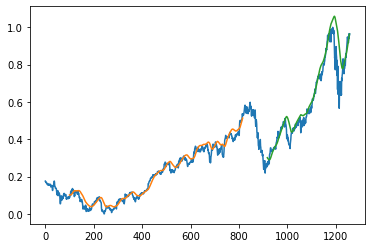

In [30]:
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()